In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from stats import mean, median, mode, multi_mode

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv("data/mouse_drug_data.csv")
clinical_trial_data = pd.read_csv("data/clinicaltrial_data.csv")

# Combine the data into a single dataset
drug_trial_data = pd.merge(mouse_drug_data, clinical_trial_data, how='outer', on='Mouse ID')

# Display the data table for preview
drug_trial_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volumes = drug_trial_data.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)']

# Convert to DataFrame
mean_tumor_volumes = pd.DataFrame(mean_tumor_volumes)

# Preview DataFrame
mean_tumor_volumes.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_volumes = drug_trial_data.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)']

# Convert to DataFrame
sem_tumor_volumes = pd.DataFrame(sem_tumor_volumes)

# Preview DataFrame
sem_tumor_volumes.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
# Minor Data Munging to Re-Format the Data Frames
# Mean
reformat_mean = mean_tumor_volumes.reset_index()
pivot_mean = reformat_mean.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']

# Preview that Reformatting worked
pivot_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
# Minor Data Munging to Re-Format the Data Frames
# Standard Error
reformat_sem = sem_tumor_volumes.reset_index()
pivot_sem = reformat_sem.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']

# Preview that Reformatting worked
pivot_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


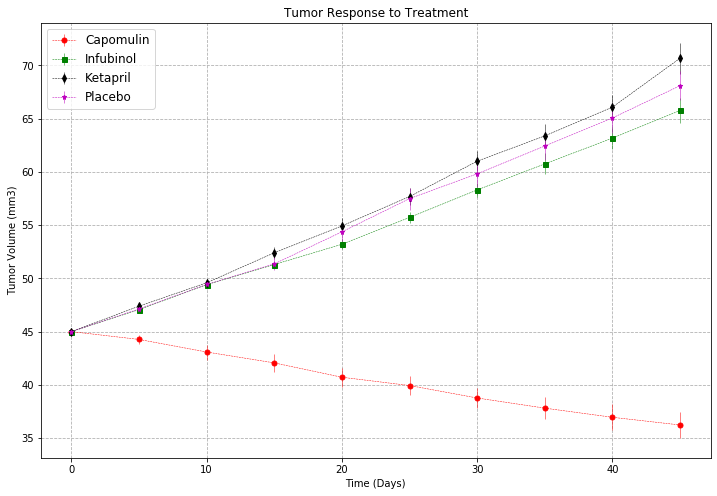

In [6]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(0, 50, 10)
x_limit = 45

plt.figure(figsize=(12,8))

plt.errorbar(pivot_mean.index, pivot_mean['Capomulin'], yerr=pivot_sem['Capomulin'], label= 'Capomulin', color='r', marker='o', markersize=5, linestyle='dashed', linewidth=0.50)
plt.errorbar(pivot_mean.index, pivot_mean['Infubinol'],yerr=pivot_sem['Infubinol'], label= 'Infubinol', color='g', marker='s', markersize=5, linestyle='dashed', linewidth=0.50)
plt.errorbar(pivot_mean.index, pivot_mean['Ketapril'],yerr=pivot_sem['Ketapril'], label= 'Ketapril', color='k', marker='d', markersize=5, linestyle='dashed', linewidth=0.50)
plt.errorbar(pivot_mean.index, pivot_mean['Placebo'],yerr=pivot_sem['Placebo'], label= 'Placebo', color='m', marker='*', markersize=5, linestyle='dashed', linewidth=0.50)

plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.grid(linestyle='dashed')
plt.legend(loc='upper left', fontsize=12, fancybox=True)

# Save the Figure
plt.savefig('Tumor Response to Treatment.png')

In [7]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_site_volumes = drug_trial_data.groupby(['Drug', 'Timepoint']).mean()['Metastatic Sites']

# Convert to DataFrame
mean_met_site_volumes = pd.DataFrame(mean_met_site_volumes)

# Preview DataFrame
mean_met_site_volumes.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_met_site_volumes = drug_trial_data.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites']

# Convert to DataFrame
sem_met_site_volumes = pd.DataFrame(sem_met_site_volumes)

# Preview DataFrame
sem_met_site_volumes.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [10]:
# Minor Data Munging to Re-Format the Data Frames
# Mean
reformat_met_site_mean = mean_met_site_volumes.reset_index()
pivot_met_site_mean = reformat_met_site_mean.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']

# Preview that Reformatting worked
pivot_met_site_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [11]:
# Minor Data Munging to Re-Format the Data Frames
# Standard Error
reformat_met_site_sem = sem_met_site_volumes.reset_index()
pivot_met_site_sem = reformat_met_site_sem.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']

# Preview that Reformatting worked
pivot_met_site_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


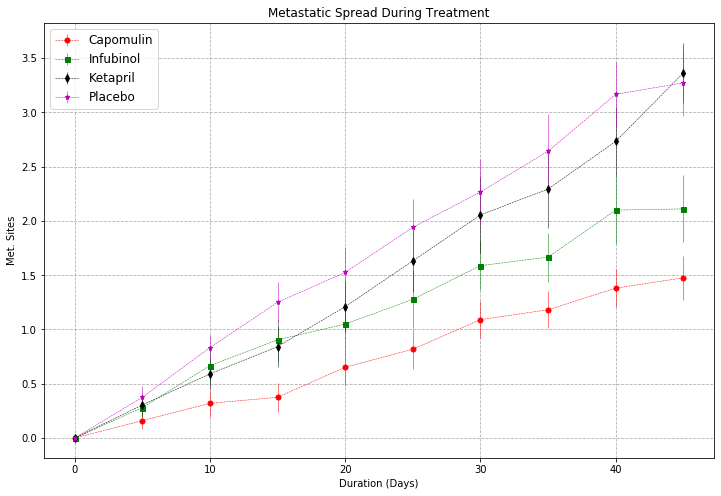

In [12]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(0, 50, 10)
x_limit = 45

plt.figure(figsize=(12,8))

plt.errorbar(pivot_met_site_mean.index, pivot_met_site_mean['Capomulin'], yerr=pivot_met_site_sem['Capomulin'], label= 'Capomulin', color='r', marker='o', markersize=5, linestyle='dashed', linewidth=0.50)
plt.errorbar(pivot_met_site_mean.index, pivot_met_site_mean['Infubinol'],yerr=pivot_met_site_sem['Infubinol'], label= 'Infubinol', color='g', marker='s', markersize=5, linestyle='dashed', linewidth=0.50)
plt.errorbar(pivot_met_site_mean.index, pivot_met_site_mean['Ketapril'],yerr=pivot_met_site_sem['Ketapril'], label= 'Ketapril', color='k', marker='d', markersize=5, linestyle='dashed', linewidth=0.50)
plt.errorbar(pivot_met_site_mean.index, pivot_met_site_mean['Placebo'],yerr=pivot_met_site_sem['Placebo'], label= 'Placebo', color='m', marker='*', markersize=5, linestyle='dashed', linewidth=0.50)

plt.title('Metastatic Spread During Treatment')
plt.xlabel('Duration (Days)')
plt.ylabel('Met. Sites')

plt.grid(linestyle='dashed')
plt.legend(loc='upper left', fontsize=12, fancybox=True)

# Save the Figure
plt.savefig('Metastatic Spread During Treatment.png')

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = drug_trial_data.groupby(['Drug', 'Timepoint']).count()['Mouse ID']

# Convert to DataFrame
mice_count_df = pd.DataFrame({'Mice Count': mice_count})

# Preview DataFrame
mice_count_df.head()

Mice Count
Drug      Timepoint            
Capomulin 0                  25
          5                  25
          10                 25
          15                 24
          20                 23

In [14]:
# Minor Data Munging to Re-Format the Data Frames
reformat_mice_count = mice_count_df.reset_index()
pivot_mice_count = reformat_mice_count.pivot(index='Timepoint', columns='Drug')['Mice Count']

# Preview the Data Frame
pivot_mice_count.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


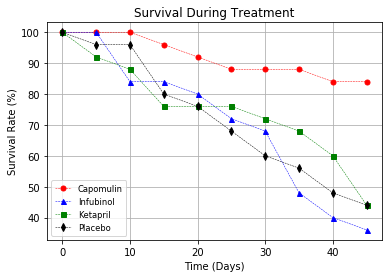

In [15]:
# Generate the Plot (Accounting for percentages)
plt.plot(100 * pivot_mice_count['Capomulin'] / 25, 'ro', label= 'Capomulin', markersize=5, linestyle='dashed', linewidth=0.50)
plt.plot(100 * pivot_mice_count['Infubinol'] / 25, 'b^', label= 'Infubinol', markersize=5, linestyle='dashed', linewidth=0.50)
plt.plot(100 * pivot_mice_count['Ketapril'] / 25, 'gs', label= 'Ketapril', markersize=5, linestyle='dashed', linewidth=0.50)
plt.plot(100 * pivot_mice_count['Placebo'] / 25, 'kd', label= 'Placebo', markersize=5, linestyle='dashed', linewidth=0.50)

plt.title('Survival During Treatment')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Time (Days)')

plt.grid(True)
plt.legend(loc='bottom left', fontsize='small', fancybox=True)

# Save the Figure
plt.savefig('Survival During Treatment.png')

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [16]:
# Calculate the percent changes for each drug
percent_change_per_drug = 100 * (pivot_mean.iloc[-1] - pivot_mean.iloc[0]) / pivot_mean.iloc[0]

# Display the data to confirm
percent_change_per_drug

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

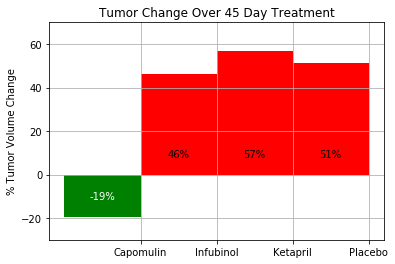

In [17]:
# Store all Relevant Percent Changes into a Tuple
percent_changes = (percent_change_per_drug['Capomulin'],
                   percent_change_per_drug['Infubinol'],
                   percent_change_per_drug['Ketapril'],
                   percent_change_per_drug['Placebo'])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(percent_changes))  
width = 1
passing = ax.bar(ind[0], percent_changes[0], width, color='green')
failing = ax.bar(ind[1:], percent_changes[1:], width, color='red')

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)

# Use functions to label the percentages of changes
def autolabelPassing(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -12, 
                '%d%%' % int(height), 
                ha='center', va='bottom', color="white")
        
def autolabelFailing(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 7, 
                '%d%%' % int(height), 
                ha='center', va='bottom', color="black")

# Call functions to implement the function calls
autolabelPassing(passing)
autolabelFailing(failing)

# Save the Figure
fig.savefig('Tumor Changes Over 45 Day Treatment.png')

# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)

In [ ]:
# A written description of three observable trends based on the data.
#•	Of the four drugs we focused on in this assignment, Capomulin appears to 
#be the only drug that had relatively significant impacts on tumor sizes over the 45-day study.
#•	Additionally, while survival rates of the mice on Capomulin did decline 
#over the life of the study, they did so at a much slower rate than those mice who were not tested with the drug. 
#•	However, while Capomulin was useful for tumor reduction in this study it 
#did not decrease the overall metastatic spread in the mice treated. While we 
#can say one of the drugs was successful in reducing tumors, we cannot say the 
#drug was successful overall at combating the cancer itself.  